In [1]:
import pandas as pd
import numpy as np

# Load Dataset

In [2]:
df = pd.read_csv('HIV_dataset.csv')
df.sample()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
484,23,UNMARRIED,YES,Illiteracy,NO,NO,Bar,Heterosexual,YES,NEGATIVE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  698 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [4]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)    

In [5]:
numerical

['Age']

In [6]:
catgcols

['Marital Staus',
 'STD',
 'Educational Background',
 'HIV TEST IN PAST YEAR',
 'AIDS education',
 'Places of seeking sex partners',
 'SEXUAL ORIENTATION',
 'Drug- taking',
 'Result']

In [7]:
df['Result'].value_counts()

NEGATIVE    349
POSITIVE    343
Positive      3
Negative      3
Name: Result, dtype: int64

In [8]:
df['Result'] =df['Result'].replace(['Positive'],'POSITIVE')

In [9]:
df['Result'].value_counts()

NEGATIVE    349
POSITIVE    346
Negative      3
Name: Result, dtype: int64

In [10]:
df['Result'] =df['Result'].replace(['Negative'],'NEGATIVE')

In [11]:
df['Result'].value_counts()

NEGATIVE    352
POSITIVE    346
Name: Result, dtype: int64

In [12]:
ind_col = [col for col in df.columns if col != 'Result']
dep_col = 'Result'

In [13]:
df[dep_col].value_counts()

NEGATIVE    352
POSITIVE    346
Name: Result, dtype: int64

# Transformasi Dataset

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
    df[col] =le.fit_transform(df[col])

In [15]:
df['Result'] = le.fit_transform(df['Result'])

In [16]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [17]:
df.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,5,0,0,1,0,0,2,2,1
1,20,5,0,0,0,2,2,2,0,0
2,23,4,2,0,0,2,2,1,0,0
3,24,4,0,0,1,2,4,2,2,1
4,18,5,2,5,1,0,1,2,2,1


In [18]:
df.to_csv('HIV-dataset.csv')

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Membuat Model Decision Tree

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.7831541218637993
akurasi data testing = 0.75 

confusion matrix : 
[[50 16]
 [19 55]]

classification report : 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        66
           1       0.77      0.74      0.76        74

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.75      0.75      0.75       140



# Simulasi Model

In [29]:
input_data = (22,5,0,0,1,0,0,2,2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('Pasien tidak terkena HIV')
else:
    print ('Pasien terkena HIV')

[0]
Pasien terkena HIV


# Visualisasi pohon keputusan

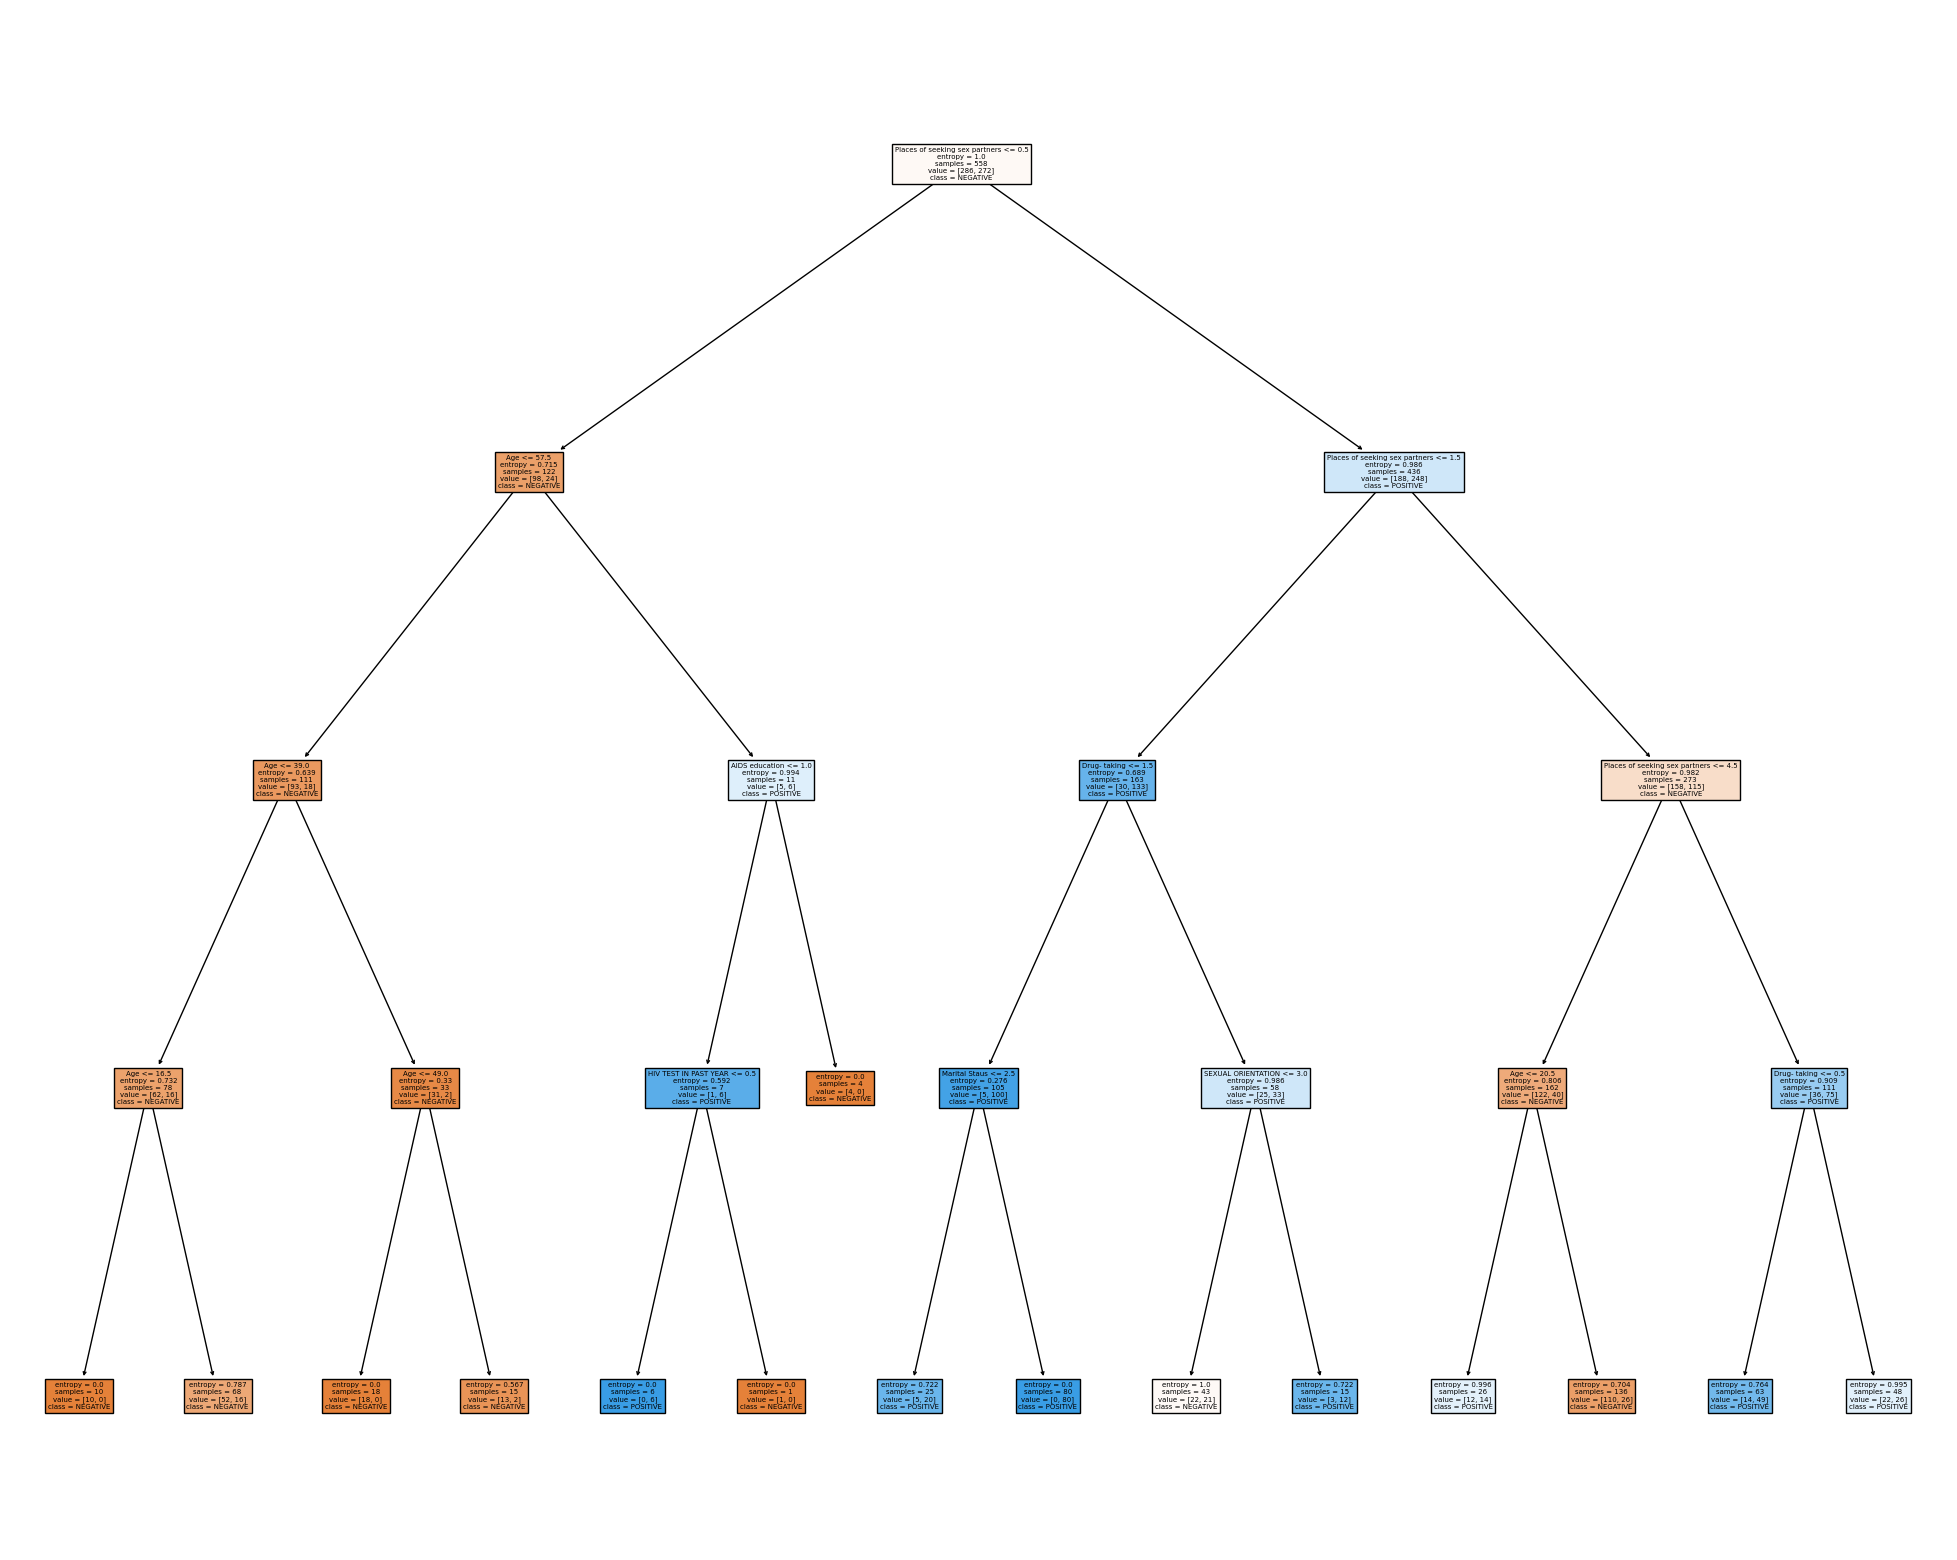

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
feature_names=ind_col,
class_names=['NEGATIVE','POSITIVE'],
filled=True
)

# Save Model

In [31]:
import pickle

filename = 'HIV.sav'
pickle.dump(model, open(filename, 'wb'))